## Customer Need Assessment Model (Part-1)

<p style="text-align: center;">By T. B. Tesema  and Stefan Gucu </p> 

### Summary

The model has been developed on theoretical pizza sales data. Its purpose is to introduce a simple model for customer need assessment. An initial analysis has indicated that the two attributes, orderly, income and age were highly associated with the frequency of customer pizza orders. Data Science methodologies listed below are used for investigations.  Although pizza order data has been utilized for the model development, key attributes used on the model are applicable to most companies, for potential market assessment.  

### Introduction

Virtually, all companies spend a lot of resources to identify customer needs and how to satisfy their customers. Because any business companies' survival and growth is highly depends on its ability to meet or exceed customer expectations.

Developing appropriate, simple, economical and reliable model is very essential for same purpose. The current project, entitled Customer Need Assessment Model is designed to achieve this goal. The model has been developed on pizza sales hypothetical data and designed to identify and predict customer needs, for the pizza companies. 

Data Science methodologies: Visualization, Clustering, Multiple Regression, and Logistic Regression are used for the investigations.  In other words, the model is intended to determine and predict a company's market. Though pizza order data has been utilized for the present model development, key attributes used on the model are applicable to most companies, for market assessment.  

**Rows**:  Rows will comprise of types of pizzas.

**Attributes/columns**:  Consists of Order-ID, Zip_Code (Postal_Code), Age, Income, Order Frequency, Gender, and Customer-Status (Visitor (V), Acquaint (A), Customer (C)). Other attributes may be added if necessary.
The project Model is divided into four-parts for publication:
>Part-1, Visualization 
>
>Part-2, K-means Clustering
>
>Part-3, Multiple Regression and 
>
>Part-4, Logistic Regression. 

The present publication consists of the first section, Part-1; the remaining order will be published in consecutive orders as listed above on github with codes. Once all parts are published on github and refined, copies of these articles are to be published on blogs or Linkin for public consumption without codes.

#### Data Loading

In [4]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.colors as colors

In [1]:
# The code was removed by Watson Studio for sharing.

,Order_ID,Pizza_Type,Zip_Code,Gender,Age,Income,Order_Frequency,Status
0,P000,Cheese,75008,F,20,30,4,V
1,P001,Veggie,75010,M,50,98,10,C
2,P002,Pepperoni,75011,M,36,46,8,C
3,P003,Meat,75012,F,22,35,5,A
4,P004,Margerhita,75013,F,45,85,9,C


#### Let us add new column called Order_Status with conditions
The Order_Status should be used to determine the status of customer order by designating "low", "medium" or "high". 

In [2]:
# Create a list to store the data
Order_Status = []

# For each row in the column,
for row in df['Order_Frequency']:
    # if more than nine,
    if row > 9:
        # Append high
        Order_Status.append('high')
    elif row > 5:
        # Append medium
        Order_Status.append('medium')
    else:
        # if less than five Append low 
        Order_Status.append('low')
        
# Create a column from the list
df['Order_Status'] = Order_Status

df.head()

,Order_ID,Pizza_Type,Zip_Code,Gender,Age,Income,Order_Frequency,Status,Order_Status
0,P000,Cheese,75008,F,20,30,4,V,low
1,P001,Veggie,75010,M,50,98,10,C,high
2,P002,Pepperoni,75011,M,36,46,8,C,medium
3,P003,Meat,75012,F,22,35,5,A,low
4,P004,Margerhita,75013,F,45,85,9,C,medium


### Visualization
The following visualizations are relevant to look into the trend and pattern of data. Each illustration will be defined on a basis of its specific trend.

#### Fig1: Scatter Plots for Age and Order_Frequency

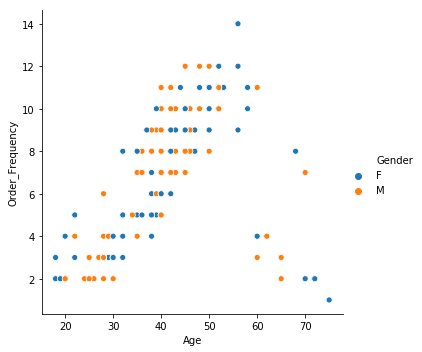

In [5]:
# Let us plot and see the trend of data
sns.relplot(x="Age", y="Order_Frequency", hue="Gender", data=df)

**Fig1** indicates the relationship between customer age and the frequency of order. On the basis of the present data, the highest the order frequency is correlated with the age of 40-50. It is probably an indication of the income efficiency of this age group. However, starting from age 60, the order frequency has significantly declined as can be seen from the figure.

#### Fig2: Regression Plot Line, between Age and Order_Frequency

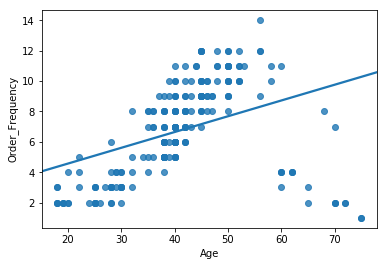

In [6]:
sns.regplot(x="Age", y="Order_Frequency", data=df, ci = None)

**Fig2** indicates the correlation of a positive trend. It is not perfect stright line, but close to that. 

#### Fig3: Reression Plot Line beteewn Income and Order_Frquency

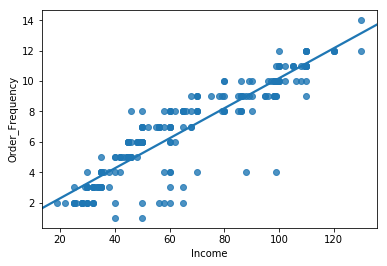

In [7]:
sns.regplot(x="Income", y="Order_Frequency", data=df, ci = None)

**Fig3** is an indication of positive high correlation and the straight line. As the income of the customer grew, the frequency of pizza order also increased.

Notice, **regplot** does not take hue. While regplot() always shows a single relationship, **lmplot**() combines regplot() with FacetGrid to provide an easy interface to show a linear regression on “faceted” plots that allows to explore interactions up to three more categorical variables, as shown below. 

#### Fig4: Relationship between Customer Status and Order_Frequency

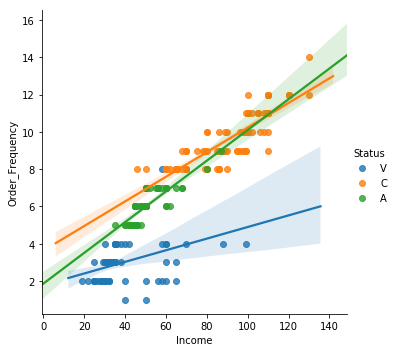

In [8]:
sns.lmplot(x="Income", y="Order_Frequency", hue="Status", data=df);

**Fig4** illustrates the prelateship among, status, order frequency and income. These customers who acquired the status of C (Customer) are with highest order frequency and income. Those with median order frequency and income are qualified to the title of A (Acquaint) and people with the low order frequency/income are received the title of V (Visitor).

#### Fig5: Relationship between Age and Customer Status

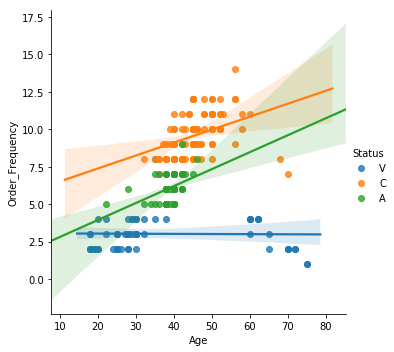

In [9]:
sns.lmplot(x="Age", y="Order_Frequency", hue="Status", data=df);

**Fig5** clearly illustrates correlation between age and status. Most of customers who acquired the C status are the age of 40-50. The remaining age groups are fallen either in A or V status.

#### Many mangers love a bar graph and histogram. Let create Bar from pandas Data-Frame.

#### Fig6: Bar Graph

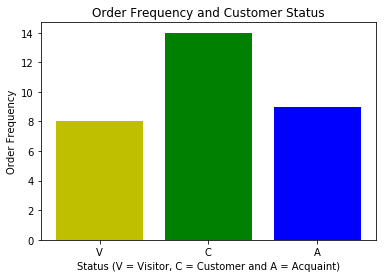

In [10]:
# Let us create color dictionary:
colors = {'V': 'y', 'C': 'g', 'A': 'b'}

# Figure and Axis
fig, ax = plt.subplots()
for i in range(len(df['Status'])):
    ax.bar(df['Status'][i], df['Order_Frequency'][i], color = colors[df['Status'][i]])

ax.set_title('Order Frequency and Customer Status')
ax.set_xlabel('Status (V = Visitor, C = Customer and A = Acquaint)')
ax.set_ylabel('Order Frequency')
plt.show()

**Fig6** is easy to visualize; the customers of C Status recorded with largest Order_Frequency. The Acquaint Status is in second place, leaving the V Status with smallest Order_Frequency.

#### When it comes to histogram seaborn's FacetGrid can give us more details for using np.linespace in a single palette.

#### Fig7: Histogram Groups in Age and Gender

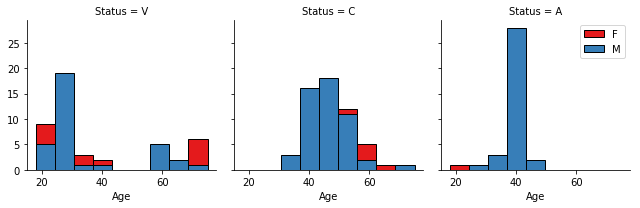

In [11]:
bins = np.linspace(df.Age.min(), df.Age.max(), 10)
g = sns.FacetGrid(df, col="Status", hue="Gender", palette="Set1", col_wrap=3)
g.map(plt.hist, 'Age', bins=bins, ec="k")

g.axes [-1].legend()
plt.show()

**Fig7** confirms similiar patterns, like other figures, but what is interesting is it clearly shows the absence the females in certain age groups, for instance 40s.

***Part-2**: **Clustering** will appear in the next publication and then **Multiple Regression** and **Logistic Regression** will continue consecutively.